<a href="https://colab.research.google.com/github/LaraAyrolla/Python-Projects/blob/main/simple-lists/pandas/Pandas-6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Visualização de Dados com Matplotib**

##### **Aluna: Lara Luísa Ayrolla Abreu**

In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [ ]:
# Carregue os dados do dataset weather que está em
# https://github.com/alanjones2/dataviz/raw/master/londonweather.csv,
# para um dataframe.

weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')

In [ ]:
# Realize uma visualização dos dados carregados para ter uma maior compressão
# das informações que está trabalhando. Exemplo df.head()

weather

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


In [ ]:
# Separe os dados correspondentes aos últimos 10 anos registrados no dataset.
conn = sqlite3.connect('DBTemperaturasLondres.db')
cursor = conn.cursor()
weather.to_sql('temperaturas', conn, if_exists='replace')

lastTenYears = pd.read_sql_query('SELECT * FROM temperaturas \
  WHERE Year > (SELECT MAX(Year) FROM temperaturas) - 10', \
  conn \
)

lastTenYears

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,636,2010,1,4.5,-0.3,51.8,51.3
1,637,2010,2,6.9,1.7,100.4,46.7
2,638,2010,3,11.1,3.7,39.8,106.4
3,639,2010,4,15.8,5.6,23.2,201.7
4,640,2010,5,17.3,7.7,20.6,170.4
...,...,...,...,...,...,...,...
107,743,2018,12,10.7,5.2,60.6,40.3
108,744,2019,1,7.6,2.0,33.2,56.4
109,745,2019,2,12.4,3.3,34.2,120.2
110,746,2019,3,13.1,5.8,49.6,119.0


In [ ]:
# Verifique qual o último ano de dados registrados no dataset.
lastTenYears = pd.read_sql_query('SELECT MAX(Year) AS \'Último Ano\' \
FROM temperaturas', conn)

lastTenYears

,Último Ano
0,2019


In [ ]:
# Obtenha os 10 anos anteriores de dados

weather2018 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2018', conn)
weather2017 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2017', conn)
weather2016 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2016', conn)
weather2015 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2015', conn)
weather2014 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2014', conn)
weather2013 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2013', conn)
weather2012 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2012', conn)
weather2011 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2011', conn)
weather2010 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2010', conn)
weather2009 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 2009', conn)

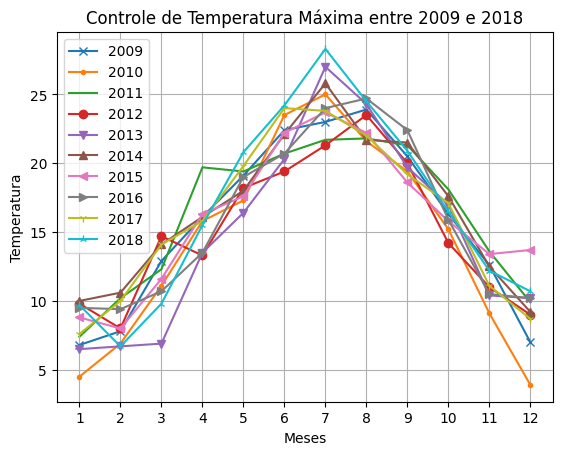

In [ ]:
# Plote um gráfico de séries "sobreposto" que permita avaliar a evolução das
# temperaturas máximas (Tmax) ao longo dos últimos 10 anos de dados registrados.

# Para cada ano, defina uma cor e um marcador diferente.
xMonths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

plt.rcdefaults()

plt.plot(xMonths, weather2009, label = "2009", marker = 'x')
plt.plot(xMonths, weather2010, label = "2010", marker = '.')
plt.plot(xMonths, weather2011, label = "2011", marker = ',')
plt.plot(xMonths, weather2012, label = "2012", marker = 'o')
plt.plot(xMonths, weather2013, label = "2013", marker = 'v')
plt.plot(xMonths, weather2014, label = "2014", marker = '^')
plt.plot(xMonths, weather2015, label = "2015", marker = '<')
plt.plot(xMonths, weather2016, label = "2016", marker = '>')
plt.plot(xMonths, weather2017, label = "2017", marker = '1')
plt.plot(xMonths, weather2018, label = "2018", marker = '2')

plt.title("Controle de Temperatura Máxima entre 2009 e 2018")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.xticks(xMonths)
plt.legend();


* **Qual o comportamento você identifica quando visualiza esse gráfico?**
Há uma certa variação na temperatura máxima de uma ano para o outro, mas em geral o padrão da temperatura é parecido, com as temperaturas mais baixas entre Novembro de um ano e Março do ano seguinte. O ano começa com as temperaturas baixas, que aumentam até haver um pico entre Maio e Setembro e depois disso começam a abaixar novamente.

* **Existe uma tendência de aumento ou diminuição da temperatura máxima?**
Nenhum dos dois. É posível perceber, inclusive, que o ano mais antigo (2009) se encontra mais ou menos no meio do restante dos anos, tendo ocorrido tanto aumentos quanto diminuições ao longo dos anos.

* **Observando o gráfico é possível dizer que está ocorrendo um aquecimento da temperatura? (Sim/Não) Por que?**
É incerto. Por mais que o ano mais atual do período (2018) seja o ano com a maior temperatura do período, também há meses em que a temperatura está mais baixa que no restante dos anos nesses mesmos meses. Além disso, alguns anos mais recentes possuem temperaturas maiores ou menores que anos mais atuais ou mais antigos. O período de tempo é curto e com muitas variações para gerar uma resposta conclusiva.

* **Qual mês e ano foi o mais quente no período em análise?**
Julho de 2018

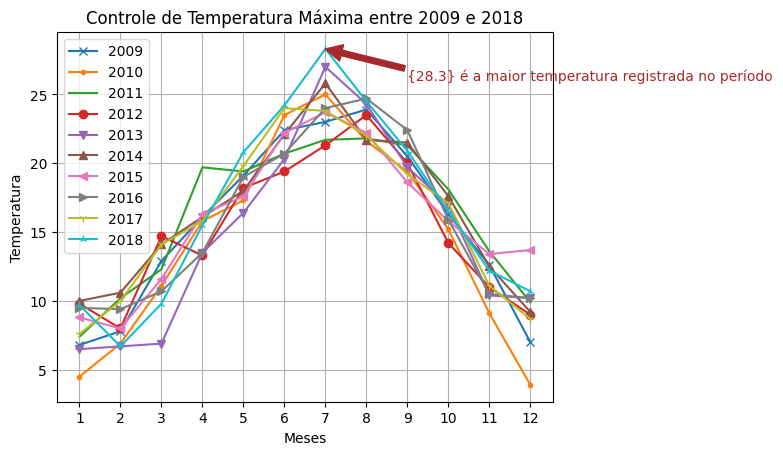

In [ ]:
# Plote novamente o gráfico adicionando uma seta (annotate)
# no mês/ano em que ocorre o pico de temperatura máxima.
# Insira a seguinte mensagem para essa anotação
# "{0.0} é a maior temperatura registrada nos últimos 10 anos"

plt.annotate('{28.3} é a maior temperatura registrada no período', \
color = 'brown', xy=(7, 28.3), xytext=(9,26), arrowprops=dict(color='brown'))

plt.rcdefaults()

plt.plot(xMonths, weather2009, label = "2009", marker = 'x')
plt.plot(xMonths, weather2010, label = "2010", marker = '.')
plt.plot(xMonths, weather2011, label = "2011", marker = ',')
plt.plot(xMonths, weather2012, label = "2012", marker = 'o')
plt.plot(xMonths, weather2013, label = "2013", marker = 'v')
plt.plot(xMonths, weather2014, label = "2014", marker = '^')
plt.plot(xMonths, weather2015, label = "2015", marker = '<')
plt.plot(xMonths, weather2016, label = "2016", marker = '>')
plt.plot(xMonths, weather2017, label = "2017", marker = '1')
plt.plot(xMonths, weather2018, label = "2018", marker = '2')

plt.title("Controle de Temperatura Máxima entre 2009 e 2018")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.xticks(xMonths)
plt.legend();

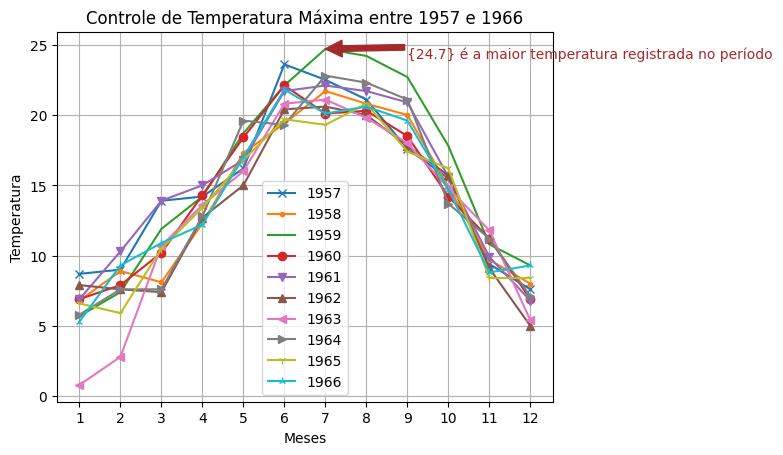

In [ ]:
# Repita essa análise para os primeiros 10 anos de dados registrados.

weather1957 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1957', conn)
weather1958 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1958', conn)
weather1959 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1959', conn)
weather1960 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1960', conn)
weather1961 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1961', conn)
weather1962 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1962', conn)
weather1963 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1963', conn)
weather1964 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1964', conn)
weather1965 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1965', conn)
weather1966 = pd.read_sql_query('SELECT Tmax FROM temperaturas \
WHERE Year = 1966', conn)


plt.rcdefaults()

plt.annotate('{24.7} é a maior temperatura registrada no período', \
color = 'brown', xy=(7,24.7), xytext=(9,24), arrowprops=dict(color='brown'))

plt.plot(xMonths, weather1957, label = "1957", marker = 'x')
plt.plot(xMonths, weather1958, label = "1958", marker = '.')
plt.plot(xMonths, weather1959, label = "1959", marker = ',')
plt.plot(xMonths, weather1960, label = "1960", marker = 'o')
plt.plot(xMonths, weather1961, label = "1961", marker = 'v')
plt.plot(xMonths, weather1962, label = "1962", marker = '^')
plt.plot(xMonths, weather1963, label = "1963", marker = '<')
plt.plot(xMonths, weather1964, label = "1964", marker = '>')
plt.plot(xMonths, weather1965, label = "1965", marker = '1')
plt.plot(xMonths, weather1966, label = "1966", marker = '2')

plt.title("Controle de Temperatura Máxima entre 1957 e 1966")
plt.ylabel("Temperatura")
plt.xlabel("Meses")
plt.grid()
plt.xticks(xMonths)
plt.legend();

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

